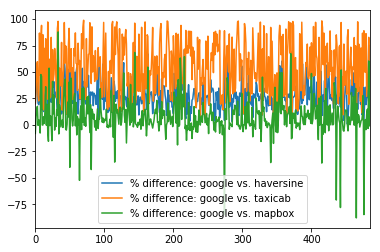

In [89]:
from pandas import DataFrame, read_csv, Series

csv = read_csv("results500.csv")

def error((a, b)):
  return 100 * (a - b)/a

# Error: line chart

a = DataFrame()
a['% difference: google vs. haversine'] = map(error, zip(csv.google, csv.haversine))
a['% difference: google vs. taxicab'] = map(error, zip(csv.google, csv.taxicab))
a['% difference: google vs. mapbox'] = map(error, zip(csv.google, csv.mapbox))

a.plot()

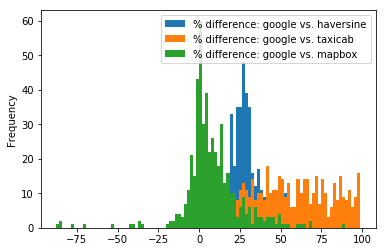

In [84]:
# Error: histogram

a.plot.hist(bins=100)

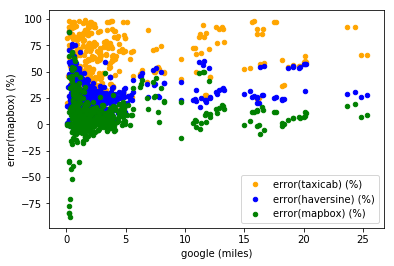

In [123]:
# Error vs. absolute miles

b = DataFrame()
b['google (miles)'] = csv.google
b['error(haversine) (%)'] = map(error, zip(csv.google, csv.haversine))
b['error(mapbox) (%)'] = map(error, zip(csv.google, csv.mapbox))
b['error(taxicab) (%)'] = map(error, zip(csv.google, csv.taxicab))

p = b.plot(kind='scatter', x='google (miles)', y='error(taxicab) (%)', color='orange', label='error(taxicab) (%)')
b.plot(kind='scatter', x='google (miles)', y='error(haversine) (%)', color='blue', label='error(haversine) (%)', ax=p)
b.plot(kind='scatter', x='google (miles)', y='error(mapbox) (%)', color='green', label='error(mapbox) (%)', ax=p)


('SEM: ', 0.81672307695074886)


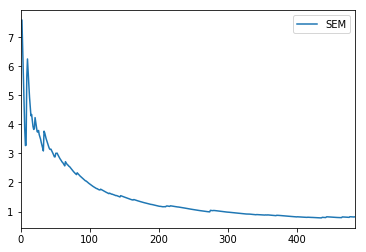

In [125]:
# Sample size vs. SEM

errors = map(error, zip(csv.google, csv.mapbox))

c = DataFrame()
c['SEM'] = map(lambda (i, _): Series(errors[0:i]).sem(), enumerate(errors))

c.plot()
print('SEM: ', Series(errors).sem())